In [1]:
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [4]:
import tensorflow as tf
print(tf.__version__)

2.20.0


In [5]:
import sys
print(sys.executable)

c:\Users\HP\AppData\Local\Programs\Python\Python313\python.exe


✅ Dataset loaded successfully!
         Date      Time  Global_active_power  Global_reactive_power  Voltage  \
0  16/12/2006  17:24:00                4.216                  0.418   234.84   
1  16/12/2006  17:25:00                5.360                  0.436   233.63   
2  16/12/2006  17:26:00                5.374                  0.498   233.29   
3  16/12/2006  17:27:00                5.388                  0.502   233.74   
4  16/12/2006  17:28:00                3.666                  0.528   235.68   

   Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
0              18.4             0.0             1.0            17.0  
1              23.0             0.0             1.0            16.0  
2              23.0             0.0             2.0            17.0  
3              23.0             0.0             1.0            17.0  
4              15.8             0.0             1.0            17.0  


C:\Users\HP\AppData\Local\Temp\ipykernel_1196\1751134183.py:34: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], errors='coerce')
C:\Users\HP\AppData\Local\Temp\ipykernel_1196\1751134183.py:47: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  data = df.resample('H').mean()


✅ Data cleaned and resampled!
                     Global_active_power
DateTime                                
2006-12-16 17:00:00             4.222889
2006-12-16 18:00:00             3.632200
2006-12-16 19:00:00             3.400233
2006-12-16 20:00:00             3.268567
2006-12-16 21:00:00             3.056467


c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 24, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 24, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,345 (114.63 KB)

 Trainable params: 29,345 (114.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
769/769 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - loss: 0.0126 - val_loss: 0.0112
Epoch 2/30
769/769 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - loss: 0.0095 - val_loss: 0.0097
Epoch 3/30
769/769 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - loss: 0.0091 - val_loss: 0.0095
Epoch 4/30
769/769 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - loss: 0.0089 - val_loss: 0.0100
Epoch 5/30
769/769 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - loss: 0.0089 - val_loss: 0.0095
Epoch 6/30
769/769 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - loss: 0.0088 - val_loss: 0.0091
Epoch 7/30
769/769 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - loss: 0.0087 - val_loss: 0.0096
Epoch 8/30
769/769 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - loss: 0.0087 - val_loss: 0.0090
Epoch 9/30
769/769 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - loss: 0.0087 - val_loss: 0.0091
Epoch 10/30
769/769 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - loss: 0.0087 - val_loss: 0.0095
Epoch 11/30
769/769 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - loss: 0.0087 - val_loss: 0.0091
Epoch 12/30
769/769 ━━━━━━━━━━

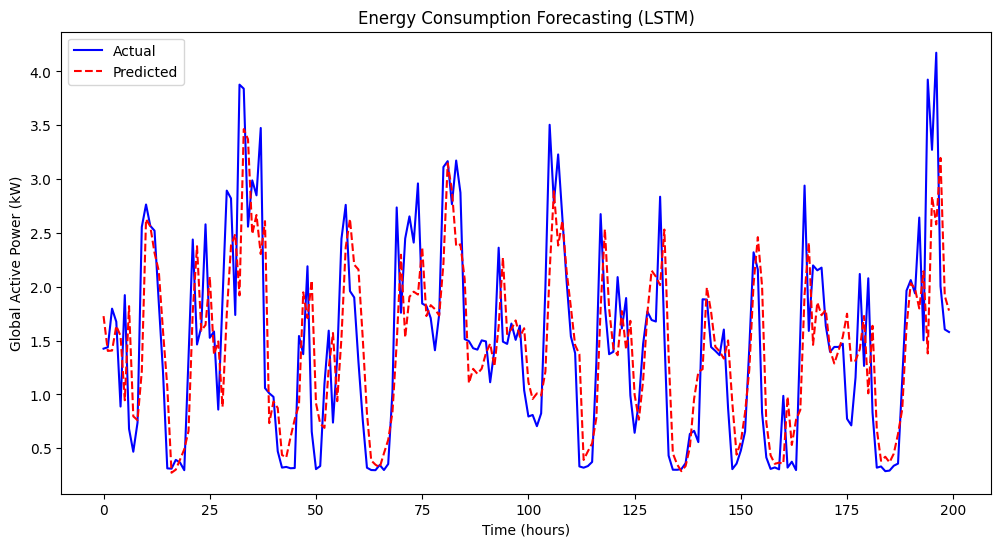

✅ Model saved as lstm_energy_forecast_model.h5
✅ Scaler saved as scaler.pkl


In [6]:
# ==============================================
# 📘 Smart Home Energy Consumption Forecasting
# Using LSTM (Deep Learning)
# ==============================================

# --- STEP 1: Imports ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import joblib
import math

# --- STEP 2: Load Dataset ---
file_path = "data/household_power_consumption.txt"  # Update path if needed

# Read the TXT file (semicolon separated)
df = pd.read_csv(
    file_path,
    sep=';', 
    na_values='?',       # Replace '?' with NaN
    low_memory=False
)

print("✅ Dataset loaded successfully!")
print(df.head())

# --- STEP 3: Data Cleaning ---
# Combine Date and Time into a single DateTime column
df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], errors='coerce')

# Convert power column to numeric
df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')

# Drop missing or invalid values
df = df.dropna(subset=['Global_active_power', 'DateTime'])

# Keep only needed columns
df = df[['DateTime', 'Global_active_power']]
df = df.set_index('DateTime')

# --- STEP 4: Resample to hourly averages ---
data = df.resample('H').mean()
data = data.dropna()  # 🔥 Important: remove NaNs after resampling

print("✅ Data cleaned and resampled!")
print(data.head())

# --- STEP 5: Normalization ---
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(data)

# --- STEP 6: Sequence preparation for LSTM ---
def create_sequences(dataset, look_back=24):
    X, y = [], []
    for i in range(len(dataset) - look_back):
        X.append(dataset[i:(i + look_back), 0])
        y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(y)

look_back = 24  # 24 hours (1 day)
X, y = create_sequences(scaled, look_back)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# --- STEP 7: Train-Test Split ---
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# --- STEP 8: Build LSTM Model ---
model = Sequential([
    LSTM(64, input_shape=(look_back, 1), return_sequences=True),
    Dropout(0.2),
    LSTM(32),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()

# --- STEP 9: Train Model ---
es = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=32,
    validation_split=0.1,
    callbacks=[es],
    verbose=1
)

# --- STEP 10: Evaluate Model ---
y_pred = model.predict(X_test)

# Inverse transform (convert predictions back to original scale)
y_pred_inv = scaler.inverse_transform(y_pred)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# --- STEP 11: Handle any NaN issues ---
if np.isnan(y_pred_inv).any() or np.isnan(y_test_inv).any():
    print("⚠️ Warning: NaN values found after inverse transform. Cleaning...")
    mask = ~np.isnan(y_test_inv.flatten()) & ~np.isnan(y_pred_inv.flatten())
    y_test_inv = y_test_inv[mask]
    y_pred_inv = y_pred_inv[mask]

# --- STEP 12: Metrics ---
mae = mean_absolute_error(y_test_inv, y_pred_inv)
rmse = math.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
mape = np.mean(np.abs((y_test_inv - y_pred_inv) / y_test_inv)) * 100

print(f"\n📊 Evaluation Metrics:")
print(f"MAE : {mae:.3f} kW")
print(f"RMSE: {rmse:.3f} kW")
print(f"MAPE: {mape:.2f}%")

# --- STEP 13: Plot Actual vs Predicted ---
plt.figure(figsize=(12,6))
plt.plot(y_test_inv[:200], label='Actual', color='blue')
plt.plot(y_pred_inv[:200], label='Predicted', color='red', linestyle='--')
plt.title('Energy Consumption Forecasting (LSTM)')
plt.xlabel('Time (hours)')
plt.ylabel('Global Active Power (kW)')
plt.legend()
plt.show()

# --- STEP 14: Save Model & Scaler ---
model.save("lstm_energy_forecast_model.h5")
joblib.dump(scaler, "scaler.pkl")

print("✅ Model saved as lstm_energy_forecast_model.h5")
print("✅ Scaler saved as scaler.pkl")
